In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.7MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Kolkata Knight Riders','Kings XI Punjab'])] 
data_f = data_f.loc[data_f.team2.isin(['Kolkata Knight Riders','Kings XI Punjab'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
47,48,2017,Chandigarh,2017-05-09,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,14,0,MM Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,S Ravi,NaN
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
111,112,2008,Kolkata,2008-05-25,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,3,Umar Gul,Eden Gardens,SJ Davis,I Shivram,NaN
122,123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN
141,142,2009,Port Elizabeth,2009-05-03,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,6,DPMD Jayawardene,St George's Park,S Asnani,MR Benson,NaN
195,196,2010,Chandigarh,2010-03-27,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,39,0,MK Tiwary,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN
207,208,2010,Kolkata,2010-04-04,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,8,DPMD Jayawardene,Eden Gardens,S Asnani,DJ Harper,NaN
269,270,2011,Kolkata,2011-04-30,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,Iqbal Abdulla,Eden Gardens,AM Saheba,SL Shastri,NaN
324,325,2012,Kolkata,2012-04-15,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,2,0,SP Narine,Eden Gardens,Asad Rauf,S Asnani,NaN


Finally , We have got a complete dataset for all the matches of KKR VS KXIP

**Let's do Q1 now**

KKR Wins - 17
KXIP Wins - 8


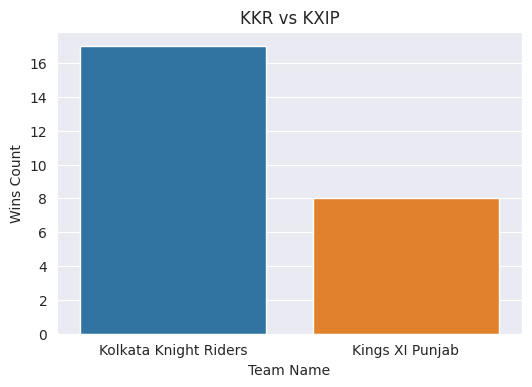

In [12]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KKR vs KXIP')
A,B =data_f.winner.value_counts()

print('KKR Wins -',A)
print('KXIP Wins -',B)

plt.show()


KKR has a much better record v KXIP. Also, in previous 6 matches KKR has won 5.

Therefore , marked KKR

**Let's do Q2 now**

**Let's find average dot balls in the contest of KKR v KXIP**

In [39]:
data_n = data.loc[data.bowling_team.isin(['Kolkata Knight Riders','Kings XI Punjab'])]
data_n = data_n.loc[data.batting_team.isin(['Kolkata Knight Riders','Kings XI Punjab'])]

In [15]:
data_n.total_runs.value_counts()

1    2434
0    2001
4     743
2     439
6     286
3      18
5      10
7       1
Name: total_runs, dtype: int64

In [16]:
data_n.match_id.nunique()

25

In [18]:
np.round(2001/25,2) # Average Dot balls in a match

80.04

Let's mark 60-90 considering our analysis

**For Q3, Let's find average wickets by both teams between 15-20 overs**



In [26]:
data_over = data_n.loc[(data_n.over>=15) & (data_n.over<=20)]

In [22]:
data_over.player_dismissed.value_counts().sum()

127

In [23]:
data_over.match_id.nunique()

25

In [24]:
np.round(127/25,2) # Average wickets lost in 15-20 over

5.08

Let's mark 4-6 considering our analysis

**Let's do Q4**

**Let's find Maxwell contribution v KKR**

In [27]:
data_n = data.loc[data.bowling_team.isin(['Kolkata Knight Riders'])]
data_n = data_n.loc[data.batting_team.isin(['Kings XI Punjab'])]
data_n.batsman.value_counts(ascending=False)

WP Saha            232
M Vohra            202
GJ Maxwell         180
SE Marsh           160
DA Miller          159
                  ... 
Karanveer Singh      1
TM Srivastava        1
BB Sran              1
P Sahu               1
Anureet Singh        1
Name: batsman, Length: 66, dtype: int64

In [32]:
data_g = data_n.loc[data.batsman.isin(['GJ Maxwell'])]
data_g.match_id.unique()

array([ 11,  48, 472, 491, 514, 517, 532, 560, 589, 608])

In [33]:
data_g.batsman_runs.sum()

252

In [34]:
data_g.match_id.nunique()

10

In [35]:
data_gm = data_n.loc[data.match_id.isin(['11','48','472','491','514','517','532','560','589','608'])]
data_gm.total_runs.sum()

1585

In [36]:
np.round(252/1585*100,2) # Average contribution of Glenn Maxwell v KKR

15.9

Well let's mark 15-22 % considering our analysis

**Let's do Q5 now**

**Let's find average no ball runs**

In [40]:
data_n.noball_runs.sum()

11

In [41]:
np.round(11/25,2)

0.44

Well considering this let's mark 0-1 only

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

